In [1]:
# Вопросы УРОК4:

# 1. Расскажите, как работает регуляризация в решающих деревьях, какие параметры мы штрафуем в данных алгоритмах?

# Регуляризация представляет собой добавление некоторой дополнительной информации
# к условию минимизации ошибки. Выполняется это, чтобы решить некорректно поставленную задачу
# или предотвратить переобучение. Чаще всего добавляемая информация принимает вид штрафа за 
# сложность модели. Например, введенные ограничения по норме векторного пространства или
# гладкости результирующей функции. Или же, с байесовской точки зрения, добавленные априорные распределения
# на параметры модели.

# Существуют следующие основные виды регуляризации:
# L1-регуляризация;
# L2-регуляризация позволяет балансировать между соответствием данным и маленькой нормой решения.

# Иными словами, переобучение в большинстве случаев проявляется в том, что в получающихся
# многочленах слишком большие коэффициенты. Соответственно и бороться с этим можно довольно естественным
# способом: нужно просто добавить в целевую функцию штраф, который бы наказывал модель за слишком большие
# коэффициенты».

# Регуляризацию можно применять с любым методом классификации, который основан на математическом
# уравнении. Примеры включают линейную, логистическую регрессию и нейронные сети. Поскольку это уменьшает величину весовых
# значений в модели, регуляризацию иногда называют сокращением весов. Основное преимущество применения регуляризации в том,
# что оно часто приводит к созданию более точной модели. Главный недостаток заключается во введении дополнительного параметра,
# значение которого нужно определить, – весового значения регуляризации. В случае логистической регрессии
# это не слишком серьезно, так как в этом алгоритм обычно используется лишь параметр скорости обучения, 
# но при использовании более сложного метода  классификации, в частности нейронных сетей, добавление 
# еще одного так называемого гиперпараметра может потребовать массы дополнительной работы 
# для подбора комбинации значений двух параметров.

         

# 2. По какому принципу рассчитывается "важность признака (feature_importance)" в ансамблях деревьев?

# Одна из особенностей решающих деревьев заключается в том,
# что они позволяют получать важности всех используемых признаков.
# Важность признака можно оценить на основе того, как сильно улучшился
# критерий качества благодаря использованию этого признака
# в вершинах дерева.

# Если построить много деревьев решений (случайный лес), то чем выше в среднем признак в дереве решений,
# тем он важнее в данной задаче классификации/регрессии. При каждом разбиении в каждом дереве улучшение
# критерия разделения - это показатель важности, связанный с переменной разделения, и накапливается он
# по всем деревьям леса отдельно для каждой переменной.

# Среднее снижение точности, вызываемое переменной, определяется во время фазы вычисления out-of-bag ошибки.
# Чем больше уменьшается точность предсказаний из-за исключения (или перестановки) одной переменной,
# тем важнее эта переменная, и поэтому переменные с большим средним уменьшением точности более важны
# для классификации данных. Среднее уменьшение неопределенности Джини (или ошибки mse в задачах регрессии)
# является мерой того, как каждая переменная способствует однородности узлов и листьев в окончательной модели 
# случайного леса. Каждый раз, когда отдельная переменная используется для разбиения узла,
# неопределенность Джини для дочерних узлов рассчитывается и сравнивается с коэффициентом исходного узла.
# Неопределенность Джини является мерой однородности от 0 (однородной) до 1 (гетерогенной).
# Изменения в значении критерия разделения суммируются для каждой переменной и нормируются в конце вычисления.
# Переменные, которые приводят к узлам с более высокой чистотой, имеют более высокое снижение коэффициента Джини.


In [2]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#для более четкого отображения графиков, векторный формат
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

#параметры графика
#from pylab import rcParams
#plt.style.use('ggplot')

import seaborn as sns; sns.set()

from scipy.stats import chisquare

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

### Обзор данных<a class="anchor" id="course_project_review"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
# Пути к директориям и файлам
path_name_test = "course_project_test.csv"
path_name_train = "course_project_train.csv"

# Загружаем данные в датафреймы
df_test = pd.read_csv(path_name_test)
df = pd.read_csv(path_name_train)


In [4]:
# Смотрим первые пять строк
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [6]:
# Смотрим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [8]:
# Обзор номинативных признаков
for cat_colname in df.select_dtypes(include='object').columns:
    print(f"{cat_colname} \n\n{df[cat_colname].value_counts()} \n{'*' * 70} \n")

Home Ownership 

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64 
********************************************************************** 

Years in current job 

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64 
********************************************************************** 

Purpose 

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name:

In [9]:
# Обзор номинативных признаков
for cat_colname in df_test.select_dtypes(include='object').columns:
    print(f"{cat_colname} \n\n{df_test[cat_colname].value_counts()} \n{'*' * 70} \n")

Home Ownership 

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64 
********************************************************************** 

Years in current job 

10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
Name: Years in current job, dtype: int64 
********************************************************************** 

Purpose 

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
educational expenses       3
vacation                   3
wedding                    2
moving                     1
Name: Purpose, dtype: int64 
****************

In [10]:
# Смотрим основные статистические характеристики данных по каждому числовому признаку, а именно:
# число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [11]:
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


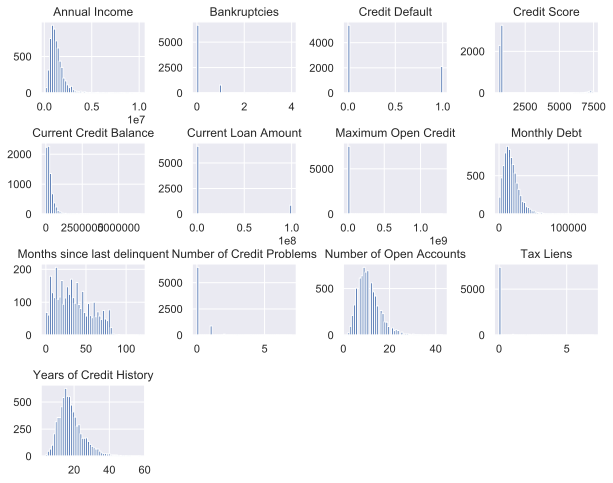

In [12]:
# Построим гистограммы параметров
df.hist(bins=50, figsize=(10,8))
plt.subplots_adjust(wspace=0.45,hspace=0.7)
plt.show()

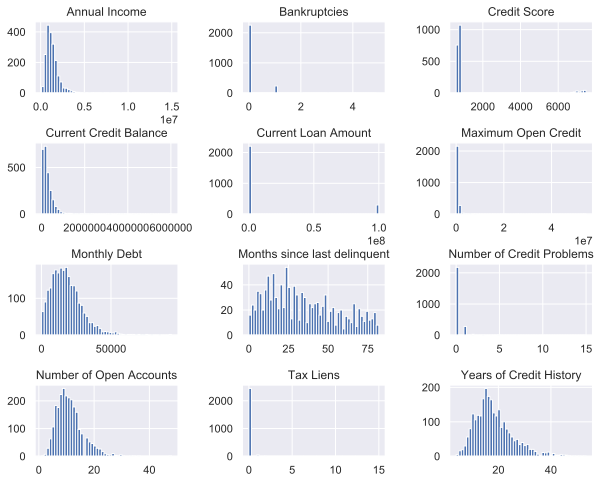

In [13]:
# Построим гистограммы параметров
df_test.hist(bins=50, figsize=(10,8))
plt.subplots_adjust(wspace=0.45,hspace=0.7)
plt.show()

In [14]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()

In [15]:
# Смотрим значения коэффициентов корреляции 
corr_matrix["Credit Default"].sort_values(ascending=False)

Credit Default                  1.000000
Credit Score                    0.442050
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Months since last delinquent    0.002598
Bankruptcies                    0.001648
Maximum Open Credit            -0.014275
Current Credit Balance         -0.019522
Years of Credit History        -0.020567
Annual Income                  -0.101375
Current Loan Amount            -0.226522
Name: Credit Default, dtype: float64

In [16]:
# Смотрим насколько сбалансирована наша целевая переменная
df['Credit Default'].value_counts()

# как видно по результатам подсчета количество 1 в два раза меньше 0, есть разбалансировка

0    5387
1    2113
Name: Credit Default, dtype: int64

In [17]:


# Определение выбросов

def indicies_of_outliers(x):
    """Возвращает индекс выбросов, используя межквартильный размах
    """
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound)|(x < lower_bound))


In [18]:
# Используя функцию определяем, в каких колонках есть выбросы
for cat_colname in df.select_dtypes(include='float64').columns:
    np_arr = indicies_of_outliers(df[cat_colname])
    if len(np_arr[0]) != 0:            
        print(f"{cat_colname} \n {df[cat_colname].value_counts()} ")

Tax Liens 
 0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64 
Number of Open Accounts 
 9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
35.0      1
41.0      1
38.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64 
Years of Credit History 
 15.0    104
16.0     99
16.5     91
17.0     86
17.5     83
       ... 
43.2      1
4.9       1
39.5      1
42.4      1
39.8      1
Name: Years of Credit History, Length: 408, dtype: int64 
Maximum Open Credit 
 0.0          65
319110.0      5
334796.0      3
607046.0      3
294030.0      3
    

In [19]:
# Используя функцию определяем, в каких колонках есть выбросы
for cat_colname in df_test.select_dtypes(include='float64').columns:
    np_arr = indicies_of_outliers(df_test[cat_colname])
    if len(np_arr[0]) != 0:            
        print(f"{cat_colname} \n {df_test[cat_colname].value_counts()} ")

Tax Liens 
 0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64 
Number of Open Accounts 
 9.0     245
8.0     223
10.0    218
11.0    211
12.0    204
6.0     183
13.0    178
7.0     176
14.0    159
5.0     106
15.0     97
16.0     81
17.0     66
4.0      63
18.0     52
19.0     46
20.0     37
21.0     29
3.0      29
22.0     26
23.0     17
27.0     10
24.0      9
2.0       7
30.0      6
25.0      6
26.0      5
28.0      3
33.0      2
48.0      1
31.0      1
1.0       1
36.0      1
29.0      1
34.0      1
Name: Number of Open Accounts, dtype: int64 
Years of Credit History 
 16.5    35
14.0    33
16.0    32
17.0    30
17.5    28
        ..
38.0     1
53.4     1
42.0     1
6.8      1
5.6      1
Name: Years of Credit History, Length: 345, dtype: int64 
Maximum Open Credit 
 0.0         14
252340.0     2
427064.0     2
286088.0     2
401522.0     2
            ..
785466.0     1
232100.0     1
382030.0     1


In [20]:
# Забегая вперед, отмечу, что выше приведен лишь способ узнать есть ли выбросы, 
# однако они не были обработаны, чтобы их обработать адекватно нужно понимать предметную область,
# а при слепой замене результаты получаются не очень хорошие.

# for cat_colname in df.select_dtypes(include='float64').columns:
#     for array_of_index in indicies_of_outliers(df[cat_colname]):
#         for i in array_of_index:
#             df.loc[df[cat_colname] == df[cat_colname][i], cat_colname] = df[cat_colname].median() 


In [21]:
# Обработка пропусков

len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [22]:
# Обработка пропусков

len(df_test) - df_test.count()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [23]:
# Проценты пропусков

def show_me_empties(df):
    """ Проценты пропусков признаков в dataframe
    """
    count = 0
    for i in df:
        pct_missing = np.mean(df[i].isnull())
        if pct_missing != 0:
            print(f"{i} - {round(pct_missing*100,2)}%")
            count += 1
    return count


In [24]:
if show_me_empties(df) == 0:
    print(f"Нет попусков")

Annual Income - 20.76%
Years in current job - 4.95%
Months since last delinquent - 54.41%
Bankruptcies - 0.19%
Credit Score - 20.76%


In [25]:
if show_me_empties(df_test) == 0:
    print(f"Нет попусков")

Annual Income - 20.52%
Years in current job - 3.44%
Months since last delinquent - 54.32%
Bankruptcies - 0.12%
Credit Score - 20.52%


In [26]:
# Удаляем Months since last delinquent, потому что большой процент пропусков

df = df.drop(["Months since last delinquent"], axis=1)

In [27]:
df_test = df_test.drop(["Months since last delinquent"], axis=1)

In [28]:
# вставляем пропуски для числовых значений

def put_empties_test_num(df, df_test):
    """Заполняет пропуски в тестовых данных медианами по тренировочным
    """
    df_numeric = df_test.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        missing = df_test[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:  # вставляем пропуски где они есть
            print('imputing missing values for: {}'.format(col))
            #df['{}_ismissing'.format(col)] = missing
            med = df[col].median()
            df_test[col] = df_test[col].fillna(med)



In [29]:
put_empties_test_num(df, df_test)

imputing missing values for: Annual Income
imputing missing values for: Bankruptcies
imputing missing values for: Credit Score


In [30]:
# вставляем пропуски для числовых значений

def put_empties_num(df):
    """Заполняет пропуски в числовых тренировочных данных
    """
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:  # вставляем пропуски где они есть
            print('imputing missing values for: {}'.format(col))
            #df['{}_ismissing'.format(col)] = missing
            med = df[col].median()
            df[col] = df[col].fillna(med)

In [31]:
# вставляем пропуски для нечисловых значений

def put_empties_test_obj(df, df_test):
    """Заполняет пропуски в тестовых данных наиболее часто встречаемыми значениями по тренировочным
    """
    df_non_numeric = df_test.select_dtypes(include='object')
    non_numeric_cols = df_non_numeric.columns.values

    for col in non_numeric_cols:
        missing = df_test[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0: # вставляем пропуски где они есть
            print('imputing missing values for: {}'.format(col))
            #df['{}_ismissing'.format(col)] = missing

            top = df[col].describe()['top'] # вставляем наиболее часто встречаемое значение
            df_test[col] = df_test[col].fillna(top)

In [32]:
put_empties_test_obj(df, df_test)

imputing missing values for: Years in current job


In [33]:
# вставляем пропуски для нечисловых значений

def put_empties_obj(df):
    """Заполняет пропуски в нечисловых тренировочных данных
    """
    df_non_numeric = df.select_dtypes(include='object')
    non_numeric_cols = df_non_numeric.columns.values

    for col in non_numeric_cols:
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0: # вставляем пропуски где они есть
            print('imputing missing values for: {}'.format(col))
            #df['{}_ismissing'.format(col)] = missing

            top = df[col].describe()['top'] # вставляем наиболее часто встречаемое значение
            df[col] = df[col].fillna(top)

In [34]:
put_empties_obj(df)

imputing missing values for: Years in current job


In [35]:
if show_me_empties(df) == 0:
    print(f"Нет попусков")

Annual Income - 20.76%
Bankruptcies - 0.19%
Credit Score - 20.76%


In [36]:
if show_me_empties(df_test) == 0:
    print(f"Нет попусков")

Нет попусков


In [37]:
# Категоризация признаков

# функция для кодирования категориальных признаков

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def categor_features(df):
    df_non_numeric = df.select_dtypes(include='object')
    non_numeric_cols = df_non_numeric.columns.values

    print(df[non_numeric_cols])

    for col in non_numeric_cols:
        df[col] = le.fit_transform(df[col])
    
    

In [38]:
categor_features(df)

     Home Ownership Years in current job             Purpose        Term
0          Own Home            10+ years  debt consolidation  Short Term
1          Own Home            10+ years  debt consolidation   Long Term
2     Home Mortgage              8 years  debt consolidation  Short Term
3          Own Home              6 years  debt consolidation  Short Term
4              Rent              8 years  debt consolidation  Short Term
...             ...                  ...                 ...         ...
7495           Rent             < 1 year               other  Short Term
7496  Home Mortgage               1 year  debt consolidation   Long Term
7497           Rent              6 years           buy a car  Short Term
7498  Home Mortgage            10+ years  debt consolidation  Short Term
7499           Rent              4 years  debt consolidation  Short Term

[7500 rows x 4 columns]


In [39]:
categor_features(df_test)

     Home Ownership Years in current job               Purpose        Term
0              Rent              4 years    debt consolidation  Short Term
1              Rent               1 year  educational expenses  Short Term
2     Home Mortgage              3 years    debt consolidation  Short Term
3     Home Mortgage            10+ years    debt consolidation  Short Term
4     Home Mortgage              6 years    debt consolidation   Long Term
...             ...                  ...                   ...         ...
2495  Home Mortgage            10+ years    debt consolidation  Short Term
2496  Home Mortgage              2 years    debt consolidation  Short Term
2497  Home Mortgage              2 years    debt consolidation  Short Term
2498           Rent            10+ years    debt consolidation  Short Term
2499           Rent            10+ years    debt consolidation   Long Term

[2500 rows x 4 columns]


In [40]:
#записываем полученные данные файл
df.to_csv(r"VYPolishchuk_first_step1.csv", index=False, encoding='utf-8')
df_test.to_csv(r"VYPolishchuk_first_step1_test.csv", index=False, encoding='utf-8')

In [41]:
#Анализ целевой переменной

#Обзор распределения

df['Credit Default'].value_counts()
df['Credit Default'].head()


0    0
1    1
2    0
3    0
4    0
Name: Credit Default, dtype: int64

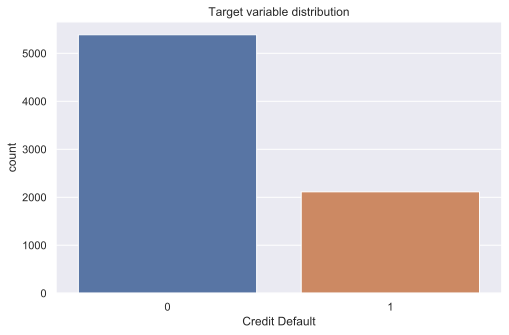

In [42]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Credit Default', data=df)

plt.title('Target variable distribution')
plt.show()

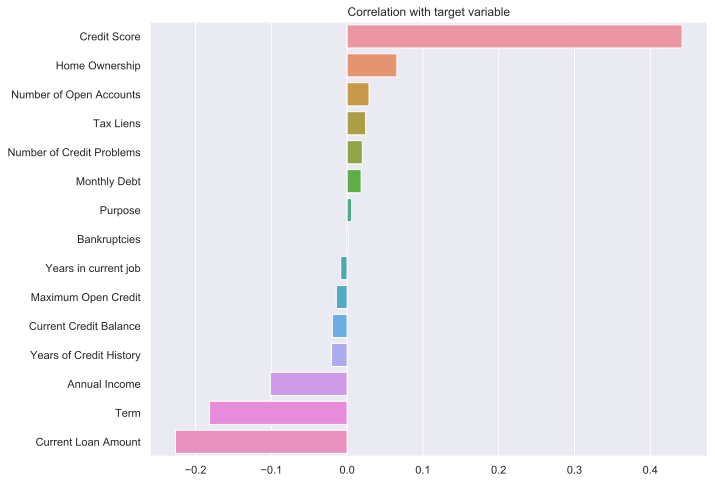

In [43]:
# Корреляция с базовыми признаками
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [44]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
corr_matrix["Credit Default"].sort_values(ascending=False)

Credit Default               1.000000
Credit Score                 0.442050
Home Ownership               0.065620
Number of Open Accounts      0.028884
Tax Liens                    0.024368
Number of Credit Problems    0.020088
Monthly Debt                 0.018480
Purpose                      0.005841
Bankruptcies                 0.001648
Years in current job        -0.008434
Maximum Open Credit         -0.014275
Current Credit Balance      -0.019522
Years of Credit History     -0.020567
Annual Income               -0.101375
Term                        -0.181487
Current Loan Amount         -0.226522
Name: Credit Default, dtype: float64

In [45]:
def highlight_corr(val):
    """ Подсветка корреляционной матрицы    
    """
    if ((val > -0.999 and val < -0.8) or (val < 0.999 and val > 0.8)):
        color = 'DodgerBlue'
    elif ((val >= -0.8 and val < -0.6) or (val <= 0.8 and val > 0.6)):
        color = 'DeepSkyBlue'
    elif ((val >= -0.6 and val < -0.4) or (val <= 0.6 and val > 0.4)):
        color = 'LightSkyBlue'
    elif ((val >= -0.4 and val < -0.2) or (val <= 0.4 and val > 0.2)):
        color = 'Yellow'
    elif ((val >= -0.2 and val < -0.09) or (val <= 0.2 and val > 0.09)):
        color = 'Yellow'        
    elif (val == 1):
        color = 'Green'
    else:
        color = 'LightGreen'
    return f'background-color:{color}'

In [46]:
# Построим корреляционную матрицу, для выявления слабо связанных с признаком факторов

corr_pd = df.corr()
display(corr_pd.style.set_caption('Корреляционная матрица').applymap(highlight_corr))

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Home Ownership,1.000000,-0.211981,0.065852,0.015281,-0.125730,-0.202650,-0.028349,0.007463,0.008190,0.018350,0.105156,-0.015400,-0.180608,-0.207456,0.024577,0.065620
Annual Income,-0.211981,1.000000,-0.040609,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.066877,0.000537,-0.096060,0.032082,0.386481,0.584819,-0.037832,-0.101375
Years in current job,0.065852,-0.040609,1.000000,-0.020812,-0.013884,-0.140185,-0.007757,-0.047540,-0.049970,-0.030020,0.018222,-0.001334,-0.033576,-0.023071,0.000867,-0.008434
Tax Liens,0.015281,0.066245,-0.020812,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.057360,0.000986,-0.004953,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,-0.125730,0.188524,-0.013884,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.019130,-0.063008,-0.071316,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,-0.202650,0.186531,-0.140185,0.009109,0.144819,1.000000,0.029247,0.071259,0.085699,0.003170,-0.044243,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,-0.028349,0.062218,-0.007757,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.011650,0.014282,0.006023,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,0.007463,-0.015407,-0.047540,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.730751,0.008385,0.020433,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Bankruptcies,0.008190,-0.066877,-0.049970,0.057360,-0.019130,0.085699,-0.011650,0.730751,1.000000,-0.006348,0.031367,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Purpose,0.018350,0.000537,-0.030020,0.000986,-0.063008,0.003170,0.014282,0.008385,-0.006348,1.000000,0.036025,-0.005547,-0.071249,-0.060227,-0.015193,0.005841


In [47]:

# Анализ корреляционной матрицы показывает, что наиболее связанными признаками с целовой переменной
# являются "Current Loan Amount","Credit Score", "Annual Income", 'Term'
# следует отметить, что выбранные признаки между собой имеют слабую взаимосвязь


In [48]:

NUM_FEATURE_NAMES = ["Current Loan Amount","Credit Score", "Annual Income", 'Term']

CAT_FEATURE_NAMES = [ 'Home Ownership', 'Term']


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [50]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    #print(pd.crosstab(y_test_true, y_test_pred))

In [51]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [52]:
for colname in CAT_FEATURE_NAMES:
    df[colname] = pd.Categorical(df[colname])
    
df[CAT_FEATURE_NAMES].dtypes

Home Ownership    category
Term              category
dtype: object

In [53]:
for colname in CAT_FEATURE_NAMES:
    df_test[colname] = pd.Categorical(df_test[colname])
    
df_test[CAT_FEATURE_NAMES].dtypes

Home Ownership    category
Term              category
dtype: object

In [54]:
#Нормализация данных
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [55]:
#Нормализация данных
scaler_test = StandardScaler()

df_norm_test = df_test.copy()
df_norm_test[NUM_FEATURE_NAMES] = scaler_test.fit_transform(df_norm_test[NUM_FEATURE_NAMES])

df_test = df_norm_test.copy()

In [56]:
#Сохранение модели для нормализации данных
import pickle
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)
    

In [57]:
#Сохранение модели для нормализации данных

with open("scaler_test.pkl", 'wb') as file:
    pickle.dump(scaler_test, file)


In [58]:
TARGET_NAME = 'Credit Default'

In [59]:
# Разбиение на train и test
X = df[NUM_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [60]:
# Балансировка целевой переменной
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [61]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [62]:
# Сохранение обучающего и тестового датасетов

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

df.to_csv("train_full.csv", index=False, encoding='utf-8')
train.to_csv("train_part.csv", index=False, encoding='utf-8')
test.to_csv("test_part.csv", index=False, encoding='utf-8')

In [63]:
# CatBoost
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      3771
           1       0.86      0.67      0.75      2958

    accuracy                           0.81      6729
   macro avg       0.82      0.79      0.80      6729
weighted avg       0.81      0.81      0.80      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1616
           1       0.54      0.47      0.51       634

    accuracy                           0.74      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.74      0.73      2250

CONFUSION MATRIX



### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a> 

In [64]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

**Подбор гиперпараметров**

In [65]:
params = {'n_estimators':[50, 100, 300, 600, 1000, 1300],
          'max_depth':[3, 5, 8]}

In [66]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [67]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 1min 4s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000227ABECE0C8>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8],
                                        'n_estimators': [50, 100, 300, 600,
                                                         1000, 1300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [68]:
rs.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [69]:
rs.best_score_

0.5299441893787401

**Обучение и оценка финальной модели**

In [70]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      3771
           1       0.78      0.55      0.64      2958

    accuracy                           0.73      6729
   macro avg       0.74      0.71      0.71      6729
weighted avg       0.74      0.73      0.72      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1616
           1       0.56      0.49      0.52       634

    accuracy                           0.75      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.74      0.75      0.74      2250

CONFUSION MATRIX

Wall time: 641 ms


### Снижение степени переобучения<a class="anchor" id="lowering_overfitting"></a>

In [71]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      3771
           1       0.75      0.46      0.57      2958

    accuracy                           0.69      6729
   macro avg       0.71      0.67      0.66      6729
weighted avg       0.71      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1616
           1       0.59      0.46      0.52       634

    accuracy                           0.76      2250
   macro avg       0.70      0.67      0.68      2250
weighted avg       0.75      0.76      0.75      2250

CONFUSION MATRIX



### Подбор оптимального размера выборки, кривая обучения<a class="anchor" id="learning_curve"></a>

In [72]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [73]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

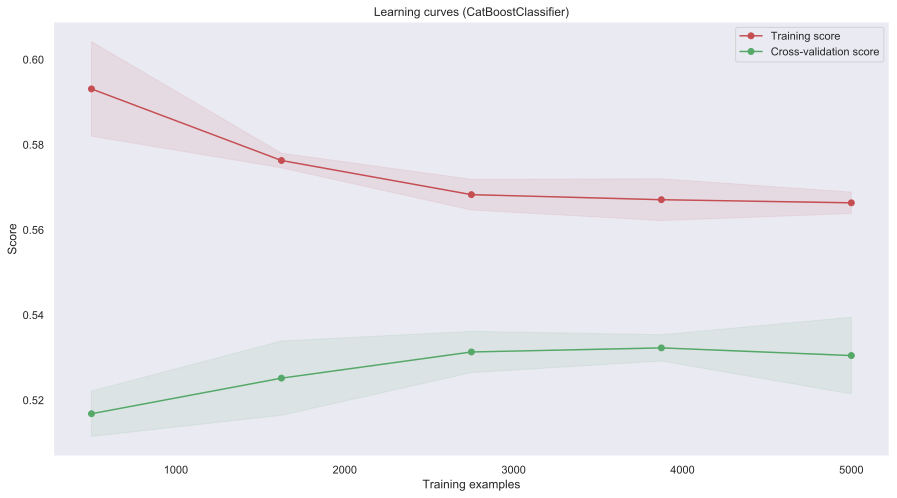

In [74]:
show_learning_curve_plot(final_model, X, y)

### Выбор порога вероятности для определения класса<a class="anchor" id="threshold_calibration"></a>

In [75]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

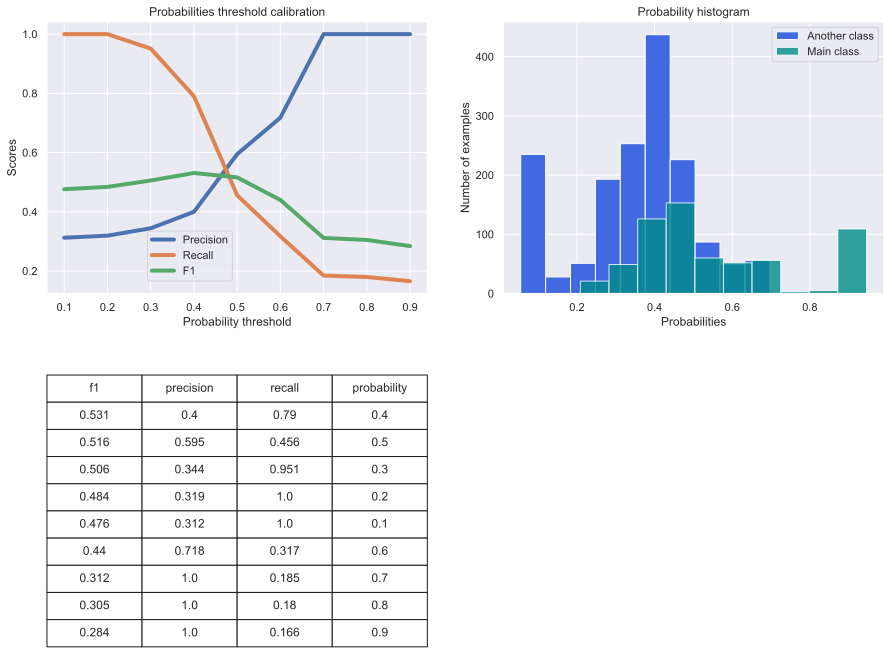

In [76]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

### Важность признаков<a class="anchor" id="feature_importances"></a>

In [77]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

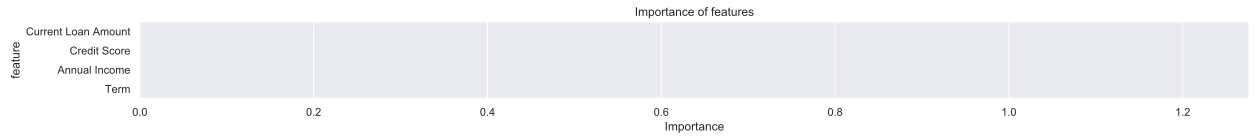

In [78]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [79]:
important_features_top

['Current Loan Amount', 'Credit Score', 'Annual Income', 'Term']

### Финальная модель<a class="anchor" id="final_model"></a>

In [80]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      3771
           1       0.75      0.46      0.57      2958

    accuracy                           0.69      6729
   macro avg       0.71      0.67      0.66      6729
weighted avg       0.71      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1616
           1       0.59      0.46      0.52       634

    accuracy                           0.76      2250
   macro avg       0.70      0.67      0.68      2250
weighted avg       0.75      0.76      0.75      2250

CONFUSION MATRIX



### Сохранение предсказаний<a class="anchor" id="final_model_saving"></a>

In [81]:

y_test_pred_test = final_model.predict(df_test[important_features_top])
#y_test_pred_probs_test = final_model.predict_proba(df_test[important_features_top])

In [82]:
#записываем модельные данные файл
np.savetxt("VYPolishchuk_predictions_.csv", y_test_pred_test, delimiter=",", encoding='utf-8')

#записываем вероятности принадлежности
#np.savetxt("VYPolishchuk_predictions_probs.csv", y_test_pred_probs_test, delimiter=",", encoding='utf-8')